In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: [Monday, Mar 10, 11:59 pm](https://github.com/UBC-CS/cpsc330-2024W2?tab=readme-ov-file#deliverable-due-dates-tentative)**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W2/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W2/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_validate,
    train_test_split,
)

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import RFECV
from xgboost import XGBRegressor
import shap
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

I am choosing to do option 2. To predict `reviews_per_month`, I will be using features such as `neighbourhood_group` and `neighbourhood` in order to locate the neighbourhoods that predicts the popularity of the location. Another option is to use `latitude` and `longitude` which can also predict an area. Another feature I can use is `room_type` as people who book airBnB's might have a preference on what sort of room they would like to stay in. `price` can also have an impact on the popularity as well. Lastly, I also believe how the host names their listing can affect it's likabiity so `name` can also be a feature to use (However, due to the added complexity of `CountVectorizer`, it might be out of the scope of amount of work)

In [3]:
airbnb_df = pd.read_csv('data/airbnb/AB_NYC_2019.csv')
airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
# my computer can not handle 70% training data
train_df, test_df = train_test_split(airbnb_df, test_size=0.3, random_state=123)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [5]:
census_summary = train_df.describe(include="all")
census_summary

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,3.422600e+04,34216,3.422600e+04,34209,34226,34226,34226.000000,34226.000000,34226,34226.000000,34226.000000,34226.000000,27236,27236.000000,34226.000000,34226.000000
unique,NaN,33662,NaN,9201,5,218,NaN,NaN,3,NaN,NaN,NaN,1676,NaN,NaN,NaN
top,NaN,Home away from home,NaN,David,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,14,NaN,292,15176,2728,NaN,NaN,17848,NaN,NaN,NaN,984,NaN,NaN,NaN
mean,1.893979e+07,NaN,6.726273e+07,NaN,NaN,NaN,40.729142,-73.952083,NaN,151.528399,7.094957,23.244814,NaN,1.369816,7.042453,112.526004
std,1.101332e+07,NaN,7.840511e+07,NaN,NaN,NaN,0.054531,0.046201,NaN,236.628392,21.548290,44.573323,NaN,1.700737,32.590803,131.420031
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.506410,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.394482e+06,NaN,7.721897e+06,NaN,NaN,NaN,40.690193,-73.983030,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.954546e+07,NaN,3.074526e+07,NaN,NaN,NaN,40.723240,-73.955550,NaN,106.000000,3.000000,5.000000,NaN,0.710000,1.000000,45.000000
75%,2.915085e+07,NaN,1.068375e+08,NaN,NaN,NaN,40.763287,-73.936270,NaN,175.000000,5.000000,23.000000,NaN,2.000000,2.000000,225.750000


1. Looking at `review_per_month`, specifically the `mean` and `50%`, it does seem like the mean (1.37) is quite higher than the median (0.71) which are some high values that pushes the mean in that direction. Thus, implying the possibility potential outliers and can affect the model's prediction preformance. We can also see this when we look it's `max` value where it is substantially higher than the mean. Additionally, it can be argued that is due to the high variance (`std=1.7`) in the values. 
2. Looking at `neightbourhood_group`, we can see that a lot of the listings are located in `Manhattan`. However, in `neighbourhood`, a lot of the listings is in `Williamsburg`, which is in Brooklyn, not Manhattan. Looking further, we can observe that the difference `freq` of these two values shows that Manhattan has the more listings, but is spread across Manhattan, rather than collected in on neighbourhood, like Williamsburg.

In [6]:
numeric_cols = ['longitude', 'latitude', 'price', 'minimum_nights', 'number_of_reviews', 'availability_365']
categorical_cols = ['neighbourhood_group', 'neighbourhood', 'room_type']
misc_cols = ['name']
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34226 entries, 36150 to 15725
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34226 non-null  int64  
 1   name                            34216 non-null  object 
 2   host_id                         34226 non-null  int64  
 3   host_name                       34209 non-null  object 
 4   neighbourhood_group             34226 non-null  object 
 5   neighbourhood                   34226 non-null  object 
 6   latitude                        34226 non-null  float64
 7   longitude                       34226 non-null  float64
 8   room_type                       34226 non-null  object 
 9   price                           34226 non-null  int64  
 10  minimum_nights                  34226 non-null  int64  
 11  number_of_reviews               34226 non-null  int64  
 12  last_review                     2

For visualisations, I chose to create histograms to show listings at locations and prices with reviews that are greater or lower than the median reviews. I chose median in this case due to the possible entries that can be seen as an outlier

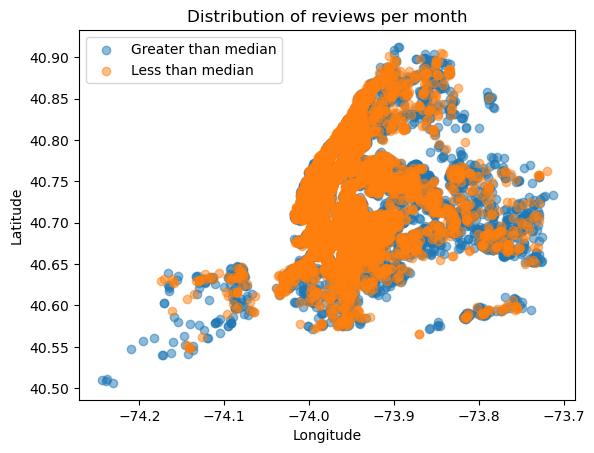

In [7]:
median_reviews_per_month = census_summary['reviews_per_month']['50%']
greater_than_mean = train_df[train_df['reviews_per_month'] >= median_reviews_per_month]
less_than_mean = train_df[train_df['reviews_per_month'] < median_reviews_per_month]

plt.scatter(greater_than_mean['longitude'], greater_than_mean['latitude'], alpha=0.5, label='Greater than median')
plt.scatter(less_than_mean['longitude'], less_than_mean['latitude'], alpha=0.5, label='Less than median')
plt.title('Distribution of reviews per month')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


There seems to be a concentration of locations that influence the distribution of reviews per month. This concentration can be explained that these areas are most likely tourist spots and that tourists who comes to New York would prefer to be close to the area

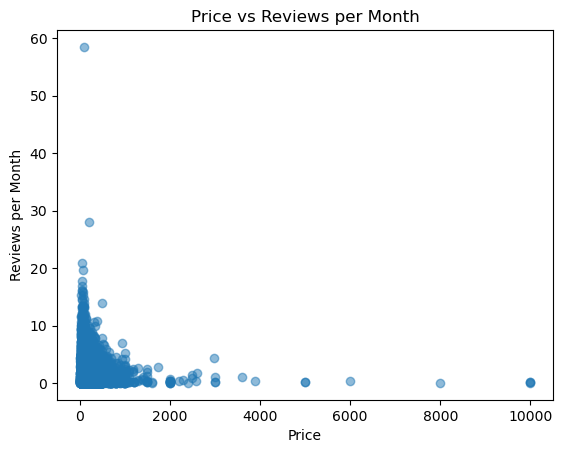

In [8]:
plt.scatter(train_df['price'], train_df['reviews_per_month'], alpha=0.5)
plt.title('Price vs Reviews per Month')
plt.xlabel('Price')
plt.ylabel('Reviews per Month')
plt.show()

This scatterplot also shows that lower prices will lead to more reviews per month which implies that cheaper AirBnB listings tends to be more popular

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

In [9]:
dropped_cols = ['id', 'host_id', 'host_name', 'last_review', 'reviews_per_month', 'calculated_host_listings_count']
# Due to the missing values of the target variable, we will drop the rows with missing values
train_df = train_df.dropna(subset=['reviews_per_month'])
test_df = test_df.dropna(subset=['reviews_per_month'])
print(f"Train size: {train_df.shape[0]}\nTest size: {test_df.shape[0]}")
X_train = train_df.drop(columns=dropped_cols)
y_train = train_df['reviews_per_month']
X_test = test_df.drop(columns=dropped_cols)
y_test = test_df['reviews_per_month']

Train size: 27236
Test size: 11607


<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

From previous iterations, I chose to add `minimum_nights`, `number_of_reviews`, and `availability_365` as they were shown to improve the preformance

| Feature | Transformer to use |
|   ---   |      -------       |  
|`latitude`|`StandardScaler`|
|`longitude`|`StandardScaler`|
|`price`|`StandardScaler`|
|`neighbourhood`|`OrdinalEncoding` due to it's high cardinality|
|`neighbourhood_group`|`OneHotEncoding`|
|`room_type`|`OneHotEncoding`|
|`minimum_nights`|`StandardScaler`|
|`availability_365`|`StandardScaler`|
|`number_of_reviews`|`StandardScaler`|

In [10]:
numeric_transformer = make_pipeline(SimpleImputer(strategy="mean"), 
                                    StandardScaler())
categorical_transformer = make_pipeline(SimpleImputer(strategy="constant", fill_value="missing"),
                                        OneHotEncoder(handle_unknown="ignore"))
ordinal_transformer = make_pipeline(SimpleImputer(strategy="constant", fill_value="missing"),
                                    OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))

# catergorical_cols are defined above in Q3
numeric_cols
categorical_cols = ['neighbourhood_group', 'room_type']
ordinal_cols = ['neighbourhood']

In [11]:
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_cols),
    (categorical_transformer, categorical_cols),
    (ordinal_transformer, ordinal_cols),
)
preprocessor 

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'price',
                                  'minimum_nights', 'number_of_reviews',
                                  'availability_365']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['neighbourhood_group', 'room_type']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 ['neighbourhood'])])

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [12]:
# Create arrays for dataframes
model = []
train_scores = []
test_scores = []


In [13]:
dummy = DummyRegressor(strategy='mean')
pipe = make_pipeline(preprocessor, dummy)
cross_val_score = cross_validate(pipe, X_train, y_train, cv=10, return_train_score=True)
dummy_scores = pd.DataFrame(cross_val_score)
model.append("Dummy")
train_scores.append(dummy_scores["train_score"].mean())
test_scores.append(dummy_scores["test_score"].mean())
dummy_scores

,fit_time,score_time,test_score,train_score
0,0.118226,0.027973,-0.000025,0.0
1,0.093214,0.024000,-0.000159,0.0
2,0.093830,0.020223,-0.000490,0.0
3,0.074002,0.018561,-0.000027,0.0
4,0.081268,0.016000,-0.000070,0.0
5,0.100241,0.019998,-0.000577,0.0
6,0.087209,0.029299,-0.000052,0.0
7,0.129454,0.029282,-0.000022,0.0
8,0.084002,0.020264,-0.000339,0.0
9,0.082570,0.021247,-0.003229,0.0


I've tried using a simple `DummyRegressor` and it looks like it is returns negative test scores which implies that it is preforming worse than simply predicting the mean.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [14]:
# This was found in Class Demo 10 when using Ridge
params = 10.0 ** np.arange(-5, 5, 1)

results = {}

for alpha in params:
    pipe = make_pipeline(preprocessor, Ridge(alpha=alpha))
    cross_val_score = cross_validate(pipe, X_train, y_train, cv=10, return_train_score=True)
    model.append(f"Ridge: alpha = {alpha:.5f}")
    test_scores.append(cross_val_score['test_score'].mean())
    train_scores.append(cross_val_score['train_score'].mean())
    results[f"alpha = {alpha:.3f}"] = f"{cross_val_score['test_score'].mean():.5f} +/- {cross_val_score['test_score'].std():.5f}"
results

{'alpha = 0.000': '0.33488 +/- 0.03543',
 'alpha = 0.001': '0.33488 +/- 0.03543',
 'alpha = 0.010': '0.33488 +/- 0.03543',
 'alpha = 0.100': '0.33488 +/- 0.03543',
 'alpha = 1.000': '0.33488 +/- 0.03544',
 'alpha = 10.000': '0.33489 +/- 0.03546',
 'alpha = 100.000': '0.33485 +/- 0.03559',
 'alpha = 1000.000': '0.33367 +/- 0.03574',
 'alpha = 10000.000': '0.30777 +/- 0.03300'}

From this we can see that the best `alpha` would be when `alpha=10`.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [15]:
# Try RandomForestRegressor
pipe = make_pipeline(preprocessor, RandomForestRegressor(n_jobs=-1))
cross_val_score = cross_validate(pipe, X_train, y_train, cv=10, n_jobs=-1, return_train_score=True)
print(f"Test Score:\n{cross_val_score['test_score'].mean():.3f} +/- {cross_val_score['test_score'].std():.3f}")
print(f"Train Score:\n{cross_val_score['train_score'].mean():.3f} +/- {cross_val_score['train_score'].std():.3f}")
model.append("RandomForest")
train_scores.append(cross_val_score["train_score"].mean())
test_scores.append(cross_val_score["test_score"].mean())

Test Score:
0.520 +/- 0.044
Train Score:
0.932 +/- 0.002


In [16]:
# Try GradientBoostingRegressor
pipe = make_pipeline(preprocessor, GradientBoostingRegressor())
cross_val_score = cross_validate(pipe, X_train, y_train, cv=10, n_jobs=-1, return_train_score=True)
cross_val_score['test_score'].mean(), cross_val_score['test_score'].std()
print(f"Test Score:\n{cross_val_score['test_score'].mean():.3f} +/- {cross_val_score['test_score'].std():.3f}")
print(f"Train Score:\n{cross_val_score['train_score'].mean():.3f} +/- {cross_val_score['train_score'].std():.3f}")
model.append("GradientBoosting")
train_scores.append(cross_val_score["train_score"].mean())
test_scores.append(cross_val_score["test_score"].mean())

Test Score:
0.509 +/- 0.047
Train Score:
0.545 +/- 0.004


In [17]:
# Try XGBRegressor
pipe = make_pipeline(preprocessor, XGBRegressor())
cross_val_score = cross_validate(pipe, X_train, y_train, cv=10, n_jobs=-1, return_train_score=True)
print(f"Test Score:\n{cross_val_score['test_score'].mean():.3f} +/- {cross_val_score['test_score'].std():.3f}")
print(f"Train Score:\n{cross_val_score['train_score'].mean():.3f} +/- {cross_val_score['train_score'].std():.3f}")
model.append("XGBRegressor")
train_scores.append(cross_val_score["train_score"].mean())
test_scores.append(cross_val_score["test_score"].mean())

Test Score:
0.526 +/- 0.044
Train Score:
0.768 +/- 0.004


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [18]:
def make_rfecv(estimator, cv=3):
    return RFECV(
        estimator,
        step=1,
        cv=cv,
        n_jobs=-1,
        min_features_to_select=1
    )

In [19]:
random_forest = RandomForestRegressor(n_jobs=-1)
rfecv = make_rfecv(random_forest, cv=10)
pipe = make_pipeline(preprocessor, rfecv)
pipe.fit(X_train, y_train)

feature_names = preprocessor.get_feature_names_out()
selected_features = np.array(feature_names)[pipe.named_steps['rfecv'].support_]
print("Selected features:", selected_features)

Selected features: ['pipeline-1__longitude' 'pipeline-1__latitude' 'pipeline-1__price'
 'pipeline-1__minimum_nights' 'pipeline-1__number_of_reviews'
 'pipeline-1__availability_365' 'pipeline-2__room_type_Entire home/apt'
 'pipeline-2__room_type_Private room' 'pipeline-3__neighbourhood']


In [20]:
# Test the model with the selected features
pipe = make_pipeline(preprocessor, rfecv.estimator_)
cross_val_score = cross_validate(pipe, X_train, y_train, cv=10, n_jobs=-1, return_train_score=True)
print(f"Test Score:\n{cross_val_score['test_score'].mean():.3f} +/- {cross_val_score['test_score'].std():.3f}")
print(f"Train Score:\n{cross_val_score['train_score'].mean():.3f} +/- {cross_val_score['train_score'].std():.3f}")
model.append("RandomForest with RFECV")
train_scores.append(cross_val_score["train_score"].mean())
test_scores.append(cross_val_score["test_score"].mean())

c:\Users\Jordan lieu\miniconda3\envs\cpsc330\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Test Score:
0.518 +/- 0.043
Train Score:
0.932 +/- 0.002


In [21]:
random_forest = GradientBoostingRegressor()
rfecv = make_rfecv(random_forest, cv=10)

pipe = make_pipeline(preprocessor, rfecv)
pipe.fit(X_train, y_train)

feature_names = preprocessor.get_feature_names_out()
selected_features = np.array(feature_names)[pipe.named_steps['rfecv'].support_]
print("Selected features:", selected_features)

KeyboardInterrupt: 

In [ ]:
# Test the model with the selected features
pipe = make_pipeline(preprocessor, rfecv.estimator_)
cross_val_score = cross_validate(pipe, X_train, y_train, cv=10, n_jobs=-1, return_train_score=True)
print(f"Test Score:\n{cross_val_score['test_score'].mean():.3f} +/- {cross_val_score['test_score'].std():.3f}")
print(f"Train Score:\n{cross_val_score['train_score'].mean():.3f} +/- {cross_val_score['train_score'].std():.3f}")
model.append("GradientBoosting with RFECV")
train_scores.append(cross_val_score["train_score"].mean())
test_scores.append(cross_val_score["test_score"].mean())

Test Score:
0.510 +/- 0.047
Train Score:
0.545 +/- 0.004


In [ ]:
xgb = XGBRegressor(n_jobs=-1)
rfecv = make_rfecv(xgb, cv=10)
X_train_transformed = preprocessor.fit_transform(X_train)
rfecv.fit(X_train_transformed, y_train)

feature_names = preprocessor.get_feature_names_out()

selected_features = np.array(feature_names)[rfecv.support_]
print("Selected features:", selected_features)

Selected features: ['pipeline-1__longitude' 'pipeline-1__latitude' 'pipeline-1__price'
 'pipeline-1__minimum_nights' 'pipeline-1__number_of_reviews'
 'pipeline-1__availability_365' 'pipeline-2__neighbourhood_group_Bronx'
 'pipeline-2__neighbourhood_group_Brooklyn'
 'pipeline-2__neighbourhood_group_Manhattan'
 'pipeline-2__neighbourhood_group_Queens'
 'pipeline-2__room_type_Entire home/apt'
 'pipeline-2__room_type_Private room' 'pipeline-2__room_type_Shared room'
 'pipeline-3__neighbourhood']


In [ ]:
# Test the model with the selected features
pipe = make_pipeline(preprocessor, rfecv.estimator_)
cross_val_score = cross_validate(pipe, X_train, y_train, cv=10, n_jobs=-1, return_train_score=True)
print(f"Test Score:\n{cross_val_score['test_score'].mean():.3f} +/- {cross_val_score['test_score'].std():.3f}")
print(f"Train Score:\n{cross_val_score['train_score'].mean():.3f} +/- {cross_val_score['train_score'].std():.3f}")
model.append("XGBRegressor with RFECV")
train_scores.append(cross_val_score["train_score"].mean())
test_scores.append(cross_val_score["test_score"].mean())

Test Score:
0.526 +/- 0.044
Train Score:
0.768 +/- 0.004


Going through RFECV returned slightly negative results: 
- `RandomForestRegressor` with RFECV preformed better
- `GradientBoostingRegressor` with RFECV preformed worse
- `XGBRegressor` preformed around the same with or without RFECV

I will abandoning RFECV for next exercises as the preformance difference is not significant (I've ran this so many times I can't count and they've mostly been non-significant results) 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
params_random_forest = {
    'randomforestregressor__n_estimators': [50, 100, 200],
    'randomforestregressor__max_depth': [5, 10, 20],
    'randomforestregressor__max_features': ['sqrt', 'log2']
}

params_gradient_boosting = {
    'gradientboostingregressor__n_estimators': [50, 100, 200],
    'gradientboostingregressor__max_depth': [5, 10, 20],
    'gradientboostingregressor__max_features': ['sqrt', 'log2']
}

params_xgb = {
    'xgbregressor__max_depth': [3, 6, 12],
    'xgbregressor__learning_rate': [0.01, 0.1, 0.2],
    'xgbregressor__subsample': [0.5, 0.75, 1], 
}


In [ ]:
# Random Forest Grid Search
random_forest = RandomForestRegressor(n_jobs=-1)
pipe = make_pipeline(preprocessor, random_forest)
random_forest_gs = GridSearchCV(pipe, params_random_forest, cv=10, n_jobs=-1, return_train_score=True)
random_forest_gs.fit(X_train, y_train)

# Append to arrays
best_result_index = random_forest_gs.best_index_
model.append("RandomForest GridSearch")
train_scores.append(random_forest_gs.cv_results_['mean_train_score'][best_result_index])
test_scores.append(random_forest_gs.cv_results_['mean_test_score'][best_result_index])

random_forest_gs.best_params_, random_forest_gs.best_score_

({'randomforestregressor__max_depth': 20,
  'randomforestregressor__max_features': 'sqrt',
  'randomforestregressor__n_estimators': 200},
 np.float64(0.5550000753911007))

In [ ]:
# Random Forest Randomized Search
random_forest = RandomForestRegressor(n_jobs=-1)
pipe = make_pipeline(preprocessor, random_forest)
random_forest_rs = RandomizedSearchCV(pipe, params_random_forest, cv=10, n_jobs=-1, return_train_score=True)
random_forest_rs.fit(X_train, y_train)

best_result_index = random_forest_rs.best_index_
model.append("RandomForest RandomizedSearch")
train_scores.append(random_forest_rs.cv_results_['mean_train_score'][best_result_index])
test_scores.append(random_forest_rs.cv_results_['mean_test_score'][best_result_index])

random_forest_rs.best_params_, random_forest_rs.best_score_

({'randomforestregressor__n_estimators': 200,
  'randomforestregressor__max_features': 'log2',
  'randomforestregressor__max_depth': 20},
 np.float64(0.554328767070283))

In [ ]:
# Gradient Boosting Grid Search
gradient_boosting = GradientBoostingRegressor()
pipe = make_pipeline(preprocessor, gradient_boosting)
gradient_boosting_gs = GridSearchCV(pipe, params_gradient_boosting, cv=10, n_jobs=-1, return_train_score=True)
gradient_boosting_gs.fit(X_train, y_train)

best_result_index = gradient_boosting_gs.best_index_
model.append("GradientBoosting GridSearch")
train_scores.append(gradient_boosting_gs.cv_results_['mean_train_score'][best_result_index])
test_scores.append(gradient_boosting_gs.cv_results_['mean_test_score'][best_result_index])

gradient_boosting_gs.best_params_, gradient_boosting_gs.best_score_

({'gradientboostingregressor__max_depth': 10,
  'gradientboostingregressor__max_features': 'log2',
  'gradientboostingregressor__n_estimators': 100},
 np.float64(0.5527396933002794))

In [ ]:
# Gradient Boosting Randomized Search
gradient_boosting = GradientBoostingRegressor()
pipe = make_pipeline(preprocessor, gradient_boosting)
gradient_boosting_rs = RandomizedSearchCV(pipe, params_gradient_boosting, cv=10, n_jobs=-1, return_train_score=True)
gradient_boosting_rs.fit(X_train, y_train)

best_result_index = gradient_boosting_rs.best_index_
model.append("GradientBoosting RandomizedSearch")
train_scores.append(gradient_boosting_rs.cv_results_['mean_train_score'][best_result_index])
test_scores.append(gradient_boosting_rs.cv_results_['mean_test_score'][best_result_index])

gradient_boosting_rs.best_params_, gradient_boosting_rs.best_score_

({'gradientboostingregressor__n_estimators': 50,
  'gradientboostingregressor__max_features': 'log2',
  'gradientboostingregressor__max_depth': 10},
 np.float64(0.547389438512192))

In [ ]:
# XGBRegressor Grid Search
xgb = XGBRegressor()
pipe = make_pipeline(preprocessor, xgb)
xgb_gs = GridSearchCV(pipe, params_xgb, cv=10, n_jobs=-1, return_train_score=True)
xgb_gs.fit(X_train, y_train)

best_result_index = xgb_gs.best_index_
model.append("XGBRegressor GridSearch")
train_scores.append(xgb_gs.cv_results_['mean_train_score'][best_result_index])
test_scores.append(xgb_gs.cv_results_['mean_test_score'][best_result_index])

xgb_gs.best_params_, xgb_gs.best_score_

({'xgbregressor__learning_rate': 0.1,
  'xgbregressor__max_depth': 6,
  'xgbregressor__subsample': 0.75},
 np.float64(0.545512827230527))

In [ ]:
# XGBRegressor Randomized Search
xgb = XGBRegressor()
pipe = make_pipeline(preprocessor, xgb)
xgb_rs = RandomizedSearchCV(pipe, params_xgb, cv=10, n_jobs=-1, return_train_score=True)
xgb_rs.fit(X_train, y_train)

best_result_index = xgb_rs.best_index_
model.append("XGBRegressor RandomizedSearch")
train_scores.append(xgb_rs.cv_results_['mean_train_score'][best_result_index])
test_scores.append(xgb_rs.cv_results_['mean_test_score'][best_result_index])

xgb_rs.best_params_, xgb_rs.best_score_

({'xgbregressor__subsample': 1,
  'xgbregressor__max_depth': 6,
  'xgbregressor__learning_rate': 0.1},
 np.float64(0.5417475738480362))

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
X_train_transformed = random_forest_gs.best_estimator_.named_steps['columntransformer'].transform(X_train)
best_model = random_forest_gs.best_estimator_.named_steps['randomforestregressor']

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_train_transformed)

feature_names = random_forest_gs.best_estimator_.named_steps['columntransformer'].get_feature_names_out()

# Create the summary plot with correct feature names
shap.summary_plot(shap_values, X_train_transformed, feature_names=feature_names)

`shap` is taking way too long but I have here is a plot from previous iteration
![image.png](img/plot.png)
From this, we see that the most important features are latitude, longitude, and neighbourhood, the location of the airBnB. Following that is the price of the airBnB.

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
X_test_transformed = random_forest_gs.best_estimator_.named_steps['columntransformer'].transform(X_test)
y_pred = random_forest_gs.best_estimator_.named_steps['randomforestregressor'].predict(X_test_transformed)

explainer = shap.TreeExplainer(best_model)
shap_values_test = explainer.shap_values(X_test_transformed)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_test[0,:], X_test_transformed[0], matplotlib=True)

Due to `shap` taking way too long, here is a plot from previous iteration
![shap_waterfall_plot.png](img/shap_waterfall_plot.png)

In [ ]:
# Testing other models
models = [random_forest_gs, gradient_boosting_gs, xgb_gs, random_forest_rs, gradient_boosting_rs, xgb_rs]
train_scores_test = []
test_scores_test = []
for model_test in models:
    test_score = model_test.score(X_test, y_test)
    test_scores_test.append(test_score)
results = pd.DataFrame({
    'Model': ['Random Forest GS', 'Gradient Boosting GS', 'XGB GS', 'Random Forest RS', 'Gradient Boosting RS', 'XGB RS'],
    'Test Score': test_scores_test
})
results.sort_values(by='Test Score', ascending=False)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

In [ ]:
cv_results_df = pd.DataFrame({
    'Model': model,
    'Train Score': train_scores,
    'Test Score': test_scores
})

cv_results_df.sort_values(by='Test Score', ascending=False)

Shown above is the cross validation results of different models

In [ ]:
results.sort_values(by='Test Score', ascending=False)

Above are model scores on the test set

2. It seems that the models are preforming poorly (test and cross validation scores tends to be between 0.1 and 0.2).
3. An idea that I did not implement was applying countvectorizer on the names of the listing
4. The final score is 0.185760 on the test set using the Random Forest with parameters `'max_depth': 10, 'max_features': 'sqrt',
  'n_estimators': 200` 

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

The biggest takeaway is that even with all the data, it is not guaranteed that the model will preform the best and that it is important to optimize the hyperparamaters to get the best results.

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)